# Processing

### Initialization

In [1]:
import numpy as np
sample = np.load('data\samplevideo.npy')
print(sample[:,0])

[ 134.  146.  151.  116.  168.  175.  151.  152.  161.  171.  184.  178.
  161.  125.  145.  156.  170.  149.  148.  164.  168.  172.  162.  112.
  153.  169.  136.  136.  139.  162.  131.  146.  135.  155.  169.  129.
  150.  150.  156.  167.  165.  154.  155.  147.  150.  160.  156.  140.
  152.  161.  141.  132.  133.  117.  143.  126.  125.  123.  165.  159.
  157.  142.  141.  180.  140.  143.  126.  157.  142.  156.  142.  182.
  174.  156.  168.  169.  149.  175.  159.  130.  185.  156.  116.  101.
  161.  162.  185.  156.  148.  124.  132.  165.  167.  154.  138.  138.
  155.  157.  151.  147.  140.  160.  169.  168.  165.  172.  171.  173.
  161.  172.  165.  176.  153.  144.  152.  154.  165.  157.  155.  134.
  168.  163.  133.  123.  120.  124.  144.  139.  162.  142.  104.  115.
  123.  119.  124.  133.  134.  146.  157.  153.  147.  140.  148.  153.
  144.  169.  149.  142.  134.  159.  159.  147.  171.  180.  171.  178.
  150.  125.  138.  151.  156.  166.  154.  138.  1

In [80]:
# Initialize the latent variable using PCA:
from sklearn.decomposition import PCA

N = sample.shape[0] # count of samples
D = sample.shape[1] # dimensionality of observed space
Q = 20 # dimensionality of observed space

X = np.zeros((N,Q)) # Initialize the latent variable

sample = (sample - np.mean(sample, 0)) / np.std(sample, 0) # normalization
pca = PCA(n_components=Q) 
X = pca.fit_transform(sample) # performing PCA
print(X[0,:])

[ 23.73651164 -20.94734111  23.281226    22.6802055   -7.50919708
  34.30870091 -12.46201579   8.07417771 -12.95784813   9.80002935
  -6.88500422   0.63095893 -13.29798142  19.54781085  -4.42927045
   2.70507576  -5.53067023   4.97089492  -7.19820107  13.64289273]


### Optimization

In [3]:
from sympy import KroneckerDelta

def K_x(w,x1,x2):
    
    #k1 = ?
    #k2 = ?
    #k3 = ?
    #k4 = ?
    #k5 = ?
    #k6 = ?
    
    return w[0]*k1(x1,x2)+w[1]*k2(x1,x2)+w[2]*k3(x1,x2)+w[3]*k4(x1,x2)+w[4]*k5(x1,x2)+w[5]*k6(x1,x2)+w[6]*KroneckerDelta(x1,x2)

In [73]:
def K_y(theta,x1,x2):
    
    return theta[0]*np.exp(-0.5*theta[1]*np.matmul((x1 - x2),np.transpose(x1 - x2)))# + theta[2]*KroneckerDelta(x1,x2)

In [5]:
def weight_likelihood(Q,N,Kx,X,W):
    alpha = 1
    Kx_inv = np.linalg.inv(Kx)
    part1 = 0.5*Q*np.log(np.linalg.det(Kx_inv))
    part2 = 0.5*np.trace(Kx_inv*np.matmul(X[1:N],np.transpose(X)[1:N]))
    part3 = alpha*np.linalg.norm(W,2)
    print(part1)
    return part1 + part2 + part3

In [20]:
# [params, options, flog] = scg('mk_likelihood', params, options, 'mk_gradient', Y, segments, kern)

# check weight_likelihood and mk_likelihood with Kx and Ky and rewrite if necessary

#write mk_weightsConstrain function
#write mk_priorIO function
#finish function weight_gradient

# search for kern gradients

# find scg function for Python

In [22]:
X

array([[ 23.73651164, -20.94734111,  23.281226  , ...,   4.97089492,
         -7.19820107,  13.64289273],
       [ 27.32166362, -26.17117093,  30.51346662, ...,   5.31042802,
         -3.90021055,   6.96400856],
       [ 26.23488005, -28.1899192 ,  29.81997129, ...,   6.88485175,
         -3.33337264,   2.68275034],
       ..., 
       [ -7.47424951, -22.09849862,  16.11440062, ...,  11.91163886,
          3.49564572,  13.00946041],
       [  4.99655619, -19.65781084,  12.97498904, ...,   4.28578476,
          8.66982982,   7.2620896 ],
       [ 11.75766947,  -9.51504745,  10.57365739, ...,   5.78658013,
         13.88101326,   3.16272507]])

[[  1.00000000e+000   3.14494244e-013   1.18957223e-021 ...,
    1.22089025e-020   1.82948616e-054   5.27544368e-036]
 [  3.14494244e-013   1.00000000e+000   4.73842438e-013 ...,
    1.33951030e-017   1.33519304e-068   2.09827932e-024]
 [  1.18957223e-021   4.73842438e-013   1.00000000e+000 ...,
    1.08037196e-022   6.66583276e-062   6.76227831e-054]
 ..., 
 [  1.22089025e-020   1.33951030e-017   1.08037196e-022 ...,
    1.00000000e+000   2.78471019e-074   6.77912871e-037]
 [  1.82948616e-054   1.33519304e-068   6.66583276e-062 ...,
    2.78471019e-074   1.00000000e+000   2.25593435e-130]
 [  5.27544368e-036   2.09827932e-024   6.76227831e-054 ...,
    6.77912871e-037   2.25593435e-130   1.00000000e+000]]


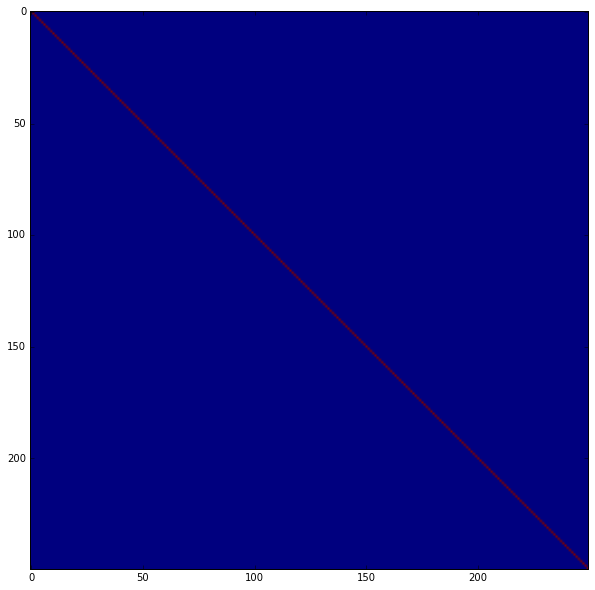

In [79]:
# K_y test:
theta = [1, 1, 1]
#Ky = K_y(theta,X,X)
#print(Ky.shape[0], Ky.shape[1])
Ky = np.zeros((N,N))
for i in range(N):
    for j in range(N):
        Ky[i,j] = K_y(theta,X[i,:],X[j,:])
print(Ky)

# visualization of kernel matrix
import matplotlib.pyplot as mp
% matplotlib inline

fig = mp.figure(figsize=(10,10)) # scale of the plot
image = mp.imshow(Ky)
mp.show()

In [6]:
# weight_likelihood test:
a = [[1,0,0],[0,1,0],[0,0,1]]
x = [9,8,7,6]
c = [1,2,3,4,5,6]

print(weight_likelihood(20,4,a,x,c))
print(np.linalg.norm(c,2))

0.0
233.039392014
9.53939201417


In [14]:
KroneckerDelta(3,3)

1

In [76]:
def mk_likelihood(D,Q,N,Kx,Ky,X,Y,theta,lamb):
    C = 0
    Kx_inv = np.linalg.inv(Kx)
    Ky_inv = np.linalg.inv(Ky)
    part1 = 0.5*D*np.log(np.linalg.det(Ky))
    part2 = 0.5*np.matmul(np.transpose(Y),np.matmul(Ky_inv,Y))
    part3 = 0.5*Q*np.log(np.linalg.det(Kx_inv))
    part4 = 0.5*np.trace(Kx_inv*np.matmul(X[1:N],np.transpose(X)[1:N]))
    part5 = np.sum(theta)
    part6 = np.sum(lamb)
    return part1 + part2 + part3 + part4 + part5 + part6 + C

In [ ]:
def weight_gradient(Q,N,Kx,X,W):
    
    #params = mk_weightsConstrain(params)
    
    #[Xin, Xout] = mk_priorIO(X, segments)
    
    Kx_inv = np.linalg.inv(Kx)
    #dL_dKx = -Q/2*invKx + 0.5*invKx*(Xout*Xout')*invKx
    
    #g = zeros(length(kern.comp),1)
    
    #for i = 1:length(kern.comp)
    #    g(i) = sum(sum(dL_dKx .* Kx{i}))
    
    norm2 = 1/np.linalg.norm(W,2)
    
    #for i = 1:length(kern.comp)
    #    g(i) = g(i) + norm2 * params(i)
    
    g = g/np.linalg.norm(g2)
    
    return -np.transpose(g)

In [21]:
def mk_gradient(Q,N,D,Kx,Ky,X,Y,theta,lamb):
    
    Kx_inv = np.linalg.inv(Kx)    
    Ky_inv = np.linalg.inv(Ky)
    
    dL_dX = dL_dKy * dKy_dX + dL_dKx * dKx_dX + dL_dx2 * dx2_dX
    
    dL_dKy = 0.5*D*np.transpose(Ky_inv)-0.5*np.transpose(np.matmul((Ky_inv*np.matmul(Y,np.transpose(Y))),Ky_inv))
    dL_dKx = 0.5*Q*np.transpose(Kx_inv)-0.5*np.transpose(np.matmul((Kx_inv*np.matmul(X[1:N],np.transpose(X[1:N]))),Kx_inv))
    dL_dx2 = 0.5*(np.matmul(Kx_inv,X[1:N])+np.matmul(np.transpose(Kx_inv),X[1:N]))
    
    #dKy_dX = ?
    #dKx_dX = ?
    #dx2_dX = ?
    
    dL_dTht1 = 0.5*D*np.trace(Ky_inv*dKy_dTht)
    dL_dTht2 = 0.5*np.transpose(np.matmul((Ky_inv*np.matmul(Y,np.transpose(Y))),Ky_inv))*dKy_dTht
    dL_dTht3 = 1/theta
    #dKy_dTht = ?
    
    dL_dLam1 = 0.5*Q*np.trace(Kx_inv*dKx_dLam)
    dL_dLam2 = 0.5*np.transpose(np.matmul((Kx_inv*np.matmul(X[1:N],np.transpose(X[1:N]))),Kx_inv))*dKx_dTLam
    dL_dLam3 = 1/lamb
    #dKx_dLam = ?
    
    dL_dTht = dL_dTht1 - dL_dTht2 + dL_dTht3
    
    dL_dLam = dL_dLam1 - dL_dLam2 + dL_dLam3
    
    return [dL_dX, dL_dTheta, dL_dLam]

<font color='red'>**Necessary kerns:**</font> 'lin','rbf','poly','ratquad','mlp','matern32'. Let's try to use GPy (Gaussian Process framework in python, from the Sheffield machine learning group). We'll get the following:

'lin' **GPy.kern.src.linear** class Linear(input_dim, variances=None, ARD=False, active_dims=None, name='linear')

'rbf' **GPy.kern.src.rbf** class RBF(input_dim, variance=1.0, lengthscale=None, ARD=False, active_dims=None, name='rbf', useGPU=False, inv_l=False)

'poly' **GPy.kern.src.poly** class Poly(input_dim, variance=1.0, scale=1.0, bias=1.0, order=3.0, active_dims=None, name='poly')

'ratquad' **GPy.kern.src.stationary** class RatQuad(input_dim, variance=1.0, lengthscale=None, power=2.0, ARD=False, active_dims=None, name='RatQuad')

'mlp' **GPy.kern.src.mlp** class MLP(input_dim, variance=1.0, weight_variance=1.0, bias_variance=1.0, ARD=False, active_dims=None, name='mlp')

'matern32' **GPy.kern.src.stationary** class Matern32(input_dim, variance=1.0, lengthscale=None, ARD=False, active_dims=None, name='Mat32')

In [1]:
import GPy

K = GPy.kern.rbf(d)

ImportError: No module named 'GPy'